# Horizon tiling of the sky

Computation of the angular size of the horizon at a given redshift z, projected on the sky.

In [28]:
import numpy as np
import matplotlib.pyplot as plt

import camb

In [29]:
# Set up the parameters for CAMB

# Set up the parameters for the fiducial cosmology
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06,  
                       As=2e-9, ns=0.965, halofit_version='mead', lmax=3000)

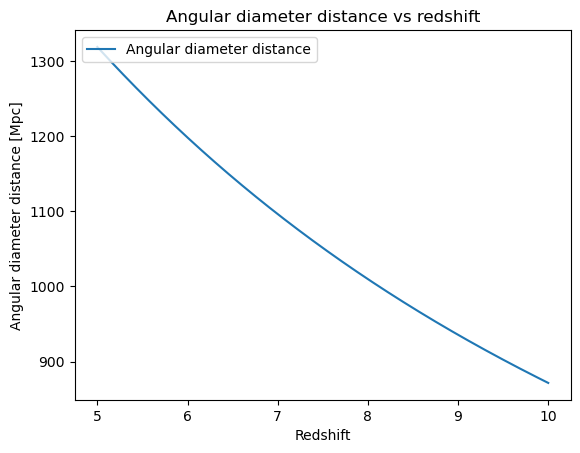

In [30]:
# Computing angular diameter distance for the fiducial cosmology
results = camb.get_results(pars) # Get the results for the fiducial cosmology

n_points = 100000
z = np.linspace(5, 10, n_points) # Redshift 

DA = results.angular_diameter_distance(z) # Angular diameter distance

plt.plot(z, DA, label='Angular diameter distance')
plt.legend(loc='upper left')
plt.xlabel('Redshift')
plt.ylabel('Angular diameter distance [Mpc]')
plt.title('Angular diameter distance vs redshift')
#plt.xlim(0, 2)

plt.show()


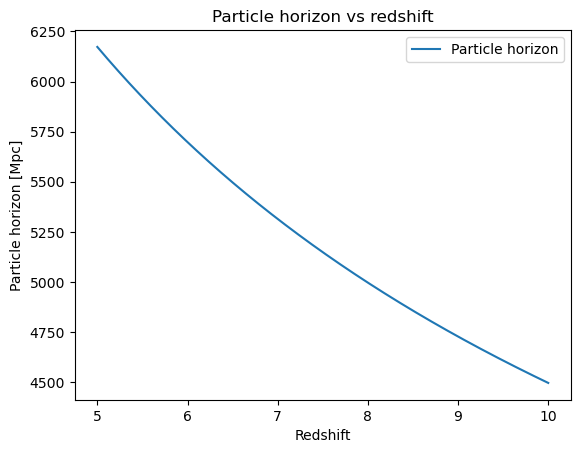

In [31]:
# Computing the particle horizon for the fiducial cosmology at different redshifts

# Array of infinite redshifts
z_inf = np.full(n_points, np.inf)

# Computing the particle horizon from infinity to redshift z
ph = results.comoving_radial_distance(z_inf) - results.comoving_radial_distance(z)

plt.plot(z, ph, label='Particle horizon')
plt.legend(loc='best')
plt.xlabel('Redshift')
plt.ylabel('Particle horizon [Mpc]')
plt.title('Particle horizon vs redshift')
#plt.xlim(0, 2)
plt.show()

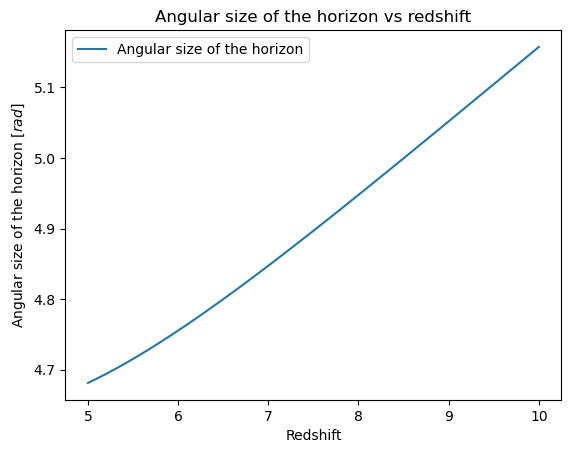

In [32]:
# Computing the angular size of the horizon at different redshifts
theta = ph / DA

plt.plot(z, theta, label='Angular size of the horizon')
plt.legend(loc='best')
plt.xlabel('Redshift')
plt.ylabel('Angular size of the horizon [$rad$]')
plt.title('Angular size of the horizon vs redshift')
#plt.xlim(1000, 1200)
plt.show()

In [33]:
theta

array([4.68126567, 4.68126868, 4.68127169, ..., 5.15743507, 5.15744035,
       5.15744563])